![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Comparando Algoritmos de Classificação</font>


![alt text](https://static.wixstatic.com/media/cd6ba3_8ded15f339da43b8828e185004e563a2~mv2.gif) 

![alt text](https://miro.medium.com/max/1080/1*Z_-lE3mQOr4WKudO37gihQ.gif)

#1° Problema de Negócio 
Precisamos escolher qual é o melhor Algoritimo de Classificação para construir uma Máquina Preditiva que, a partir de dados históricos da empresa, faça a previsão dos **clientes** que estão mais propensos a **adquirir um seguro**.



# 2° Análise Exploratória dos Dados

In [72]:
# Bibliotecas default
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importação de 9 Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
# Se conectando na Fonte de Dados
data = pd.read_csv('/content/seguro.csv', sep=',')

In [ ]:
# Informações Gerais da Fonte de Dados
data.info()

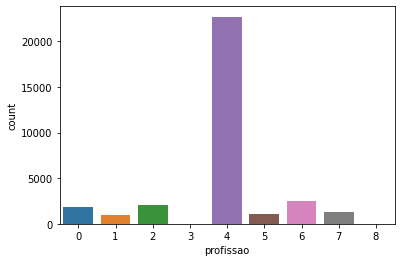

In [31]:
# Análise Exploratória da Variável
data.profissao.value_counts()
graf = sns.countplot(x="profissao", data=data)

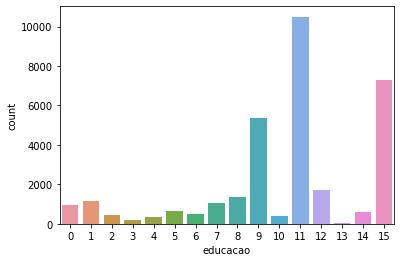

In [32]:
# Análise Exploratória da Variável
data.educacao.value_counts()
graf = sns.countplot(x="educacao", data=data)

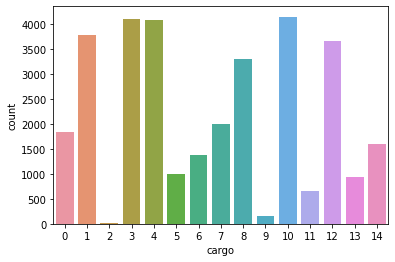

In [33]:
# Análise Exploratória da Variável
data.cargo.value_counts()
graf = sns.countplot(x="cargo", data=data)

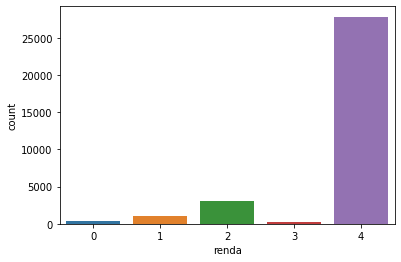

In [34]:
# Análise Exploratória da Variável
data.renda.value_counts()
graf = sns.countplot(x="renda", data=data)

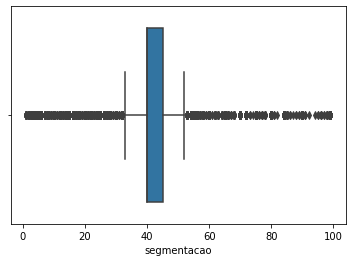

In [76]:
# Análise Exploratória da Variável
data.segmentacao.value_counts()
graf = sns.boxplot(x=data["segmentacao"])


In [77]:
# Análise Exploratória da Variável
data.segmentacao.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: segmentacao, Length: 94, dtype: int64

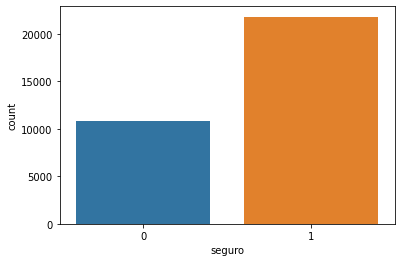

In [78]:
# Análise Exploratória da Variável
data.seguro.value_counts()
graf = sns.countplot(x="seguro", data=data)

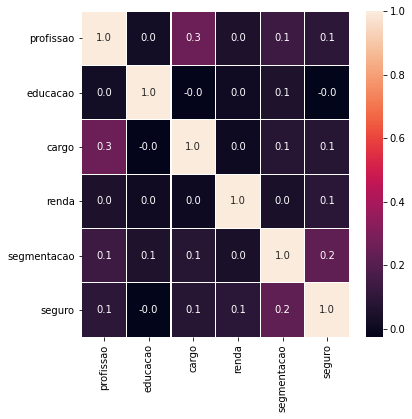

In [79]:
#correlation map
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.05, fmt= '.1f',ax=ax)
plt.show()

#3° Pré-Processamento dos Dados

In [38]:
# Take the fields of interest and plug them into variable X
X = data[['renda', 'cargo', 'educacao', 'profissao','segmentacao']]
# Make sure to provide the corresponding truth value
Y = data['seguro'].values.tolist()

# Split the data into test and training (30% for test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)



#4° Máquina Preditiva

In [17]:
# Comparando os 9 Algoritmos de Classificação

#67,39% clf = SVC()
#68,60% clf = LogisticRegression()
#71,83% clf = DecisionTreeClassifier()
#72,32% clf = KNeighborsClassifier()
#72,53% clf = MLPClassifier()
#73,76% clf = RandomForestClassifier()
#75,19% clf = GradientBoostingClassifier()
#74,55% clf = XGBClassifier()
#75,40% clf = LGBMClassifier()



In [117]:
# Criando o Classificador com o Algoritmo a ser Avaliado
clf =  LGBMClassifier()
clf

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [118]:
# Train the classifier using the train data
clf = clf.fit(X_train, Y_train)

#5° Avaliação da Máquina Preditiva 

In [119]:
# Validate the classifier
accuracy = clf.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))

# Make a confusion matrix
prediction = clf.predict(X_test)

cm = confusion_matrix(prediction, Y_test)
cr = classification_report(prediction, Y_test)
print(cm)
print(cr)

Accuracy: 0.7360016378339646
[[1675 1002]
 [1577 5515]]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      2677
           1       0.85      0.78      0.81      7092

    accuracy                           0.74      9769
   macro avg       0.68      0.70      0.69      9769
weighted avg       0.76      0.74      0.74      9769



In [ ]:
                                        #Acurácia     #F1 
#LogisticRegression                     67,58%        24%
#SVC                                    67,68%        26%
#KNeighborsClassifier                   70,93%        52%
#DecisionTreeClassifier                 71,93%        56%
#MLPClassifier                          72,21%        45%
#RandomForestClassifier                 72,87%        56%
#GradientBoostingClassifier             74,95%        57%
#XGBClassifier                          75,02%        57%
#LightGBM                               75,01%        59%


#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [70]:
from IPython.core.display import HTML
HTML('<iframe width="340" height="200" src="https://www.youtube.com/embed/K1y3Sf6xw_g" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')